In [ ]:
import pandas as pd

In [ ]:
ratings=pd.read_csv('/content/drive/MyDrive/인프런_추천시스템입문/data/ml-latest-small/ratings.csv')
ratings.sample()

,userId,movieId,rating,timestamp
43031,288,7293,3.0,1132939263


In [ ]:
ratings.shape

(100836, 4)

In [ ]:
ratings['userId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
print(len(ratings['userId'].unique())) #610명의 유저 데이터

610


In [ ]:
print(len(ratings['movieId'].unique())) #9724개의 영화 데이터

9724


In [ ]:
ratings['rating']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: rating, Length: 100836, dtype: float64

In [ ]:
ratings['rating'].mean()

3.501556983616962

In [ ]:
ratings['rating'].min()

0.5

In [ ]:
ratings['rating'].max()

5.0

In [ ]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

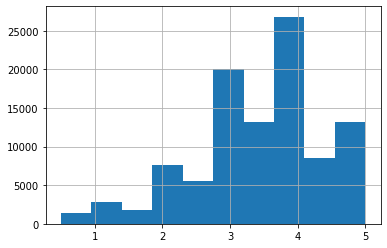

In [ ]:
ratings['rating'].hist()
#안 나오면 %matplotlib inline

# 사람들은 평균적으로 몇 개의 영화에 대해서 rating을 남겼는가?

In [ ]:
ratings.groupby('userId')['movieId'].count()

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: movieId, Length: 610, dtype: int64

In [ ]:
users=ratings.groupby('userId')['movieId'].count()
users[:5]

userId
1    232
2     29
3     39
4    216
5     44
Name: movieId, dtype: int64

In [ ]:
users.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

In [ ]:
import seaborn as sns

In [ ]:
users.values #어떤 사람이 몇 개의 영화를 봤는가

array([ 232,   29,   39,  216,   44,  314,  152,   47,   46,  140,   64,
         32,   31,   48,  135,   98,  105,  502,  703,  242,  443,  119,
        121,  110,   26,   21,  135,  570,   81,   34,   50,  102,  156,
         86,   23,   60,   21,   78,  100,  103,  217,  440,  114,   48,
        399,   42,  140,   33,   21,  310,  359,  130,   20,   33,   25,
         46,  476,  112,  107,   22,   39,  366,  271,  517,   34,  345,
         36, 1260,   46,   62,   35,   45,  210,  177,   69,  119,   29,
         61,   64,  167,   26,  227,  118,  293,   34,   70,   21,   56,
        518,   54,  575,   24,   97,   56,  168,   78,   36,   92,   53,
        148,   61,   56,  377,  273,  722,   33,   34,   76,  127,   51,
        646,   65,  150,   31,  112,   87,  165,   22,  215,   22,   58,
        292,   56,   50,  360,   38,   22,   33,  140,   28,   69,  347,
         35,   35,  279,  111,  141,   22,  194,  608,  168,   38,   71,
        128,   23,   32,   20,   48,   58,   26,   

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


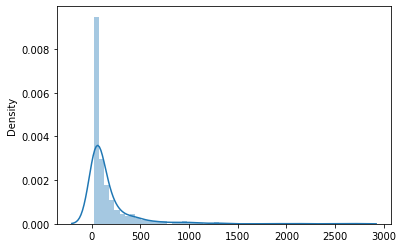

In [ ]:
sns.distplot(users.values)
#power law distribution(멱함수 분포)

# 사람들이 많이 보는 영화는?

In [ ]:
ratings.groupby('movieId')['userId'].count()

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: userId, Length: 9724, dtype: int64

In [ ]:
films=ratings.groupby('movieId')['userId'].count()
films[:5]

movieId
1    215
2    110
3     52
4      7
5     49
Name: userId, dtype: int64

In [ ]:
films.describe()

count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: userId, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


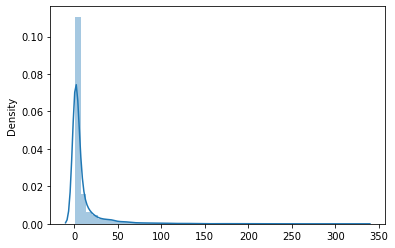

In [ ]:
sns.distplot(films.values)

In [ ]:
films.sort_values(ascending=False)[:5]

movieId
356     329
318     317
296     307
593     279
2571    278
Name: userId, dtype: int64

In [ ]:
movies=pd.read_csv('/content/drive/MyDrive/인프런_추천시스템입문/data/ml-latest-small/movies.csv', index_col='movieId')

In [ ]:
movies

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


In [ ]:
movies.loc[356]

title          Forrest Gump (1994)
genres    Comedy|Drama|Romance|War
Name: 356, dtype: object

In [ ]:
#movies.loc(index, column)
movies.loc[[356, 318, 296, 593, 2571]]

,title,genres
movieId,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War
318,"Shawshank Redemption, The (1994)",Crime|Drama
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


# 겨울왕국 평점 보기

In [ ]:
#겨울왕국은 movieId=106696
movies.loc[106696]

title                                         Frozen (2013)
genres    Adventure|Animation|Comedy|Fantasy|Musical|Rom...
Name: 106696, dtype: object

In [ ]:
ratings['movieId']==106696

0         False
1         False
2         False
3         False
4         False
          ...  
100831    False
100832    False
100833    False
100834    False
100835    False
Name: movieId, Length: 100836, dtype: bool

In [ ]:
frozen=ratings[ratings['movieId']==106696]

In [ ]:
len(frozen)

29

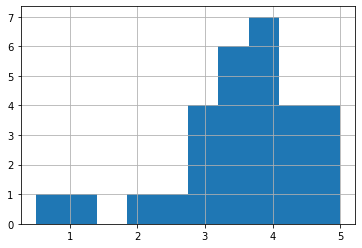

In [ ]:
frozen['rating'].hist()

In [ ]:
frozen
#567번은 겨울왕국이 싫어서 0.5점을 준 것인가? 아니면 원래 모든 영화들에 점수를 짜게 주는가?

,userId,movieId,rating,timestamp
1245,10,106696,4.5,1455306204
3572,21,106696,4.0,1403460685
9418,63,106696,5.0,1443461176
16798,105,106696,3.5,1447563589
21852,141,106696,3.0,1513129988
21967,143,106696,4.0,1444768621
22567,153,106696,2.5,1525552648
23219,159,106696,3.0,1508640298
25783,177,106696,5.0,1435529765
35769,241,106696,4.0,1447540037


In [ ]:
ratings[ratings['userId']==567]

,userId,movieId,rating,timestamp
87791,567,1,3.5,1525286001
87792,567,34,2.5,1525288053
87793,567,50,1.0,1525282012
87794,567,101,3.0,1525287210
87795,567,260,2.0,1525288368
...,...,...,...,...
88171,567,180031,4.0,1525284143
88172,567,180985,1.0,1525285297
88173,567,182823,1.0,1525289422
88174,567,183897,3.5,1525282061


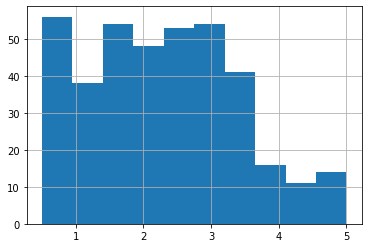

In [ ]:
ratings.loc[ratings['userId']==567, 'rating'].hist()
#전반적으로 낮은 점수를 많이 주는 사람임

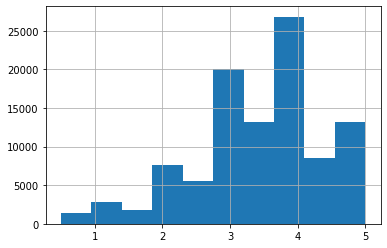

In [ ]:
ratings['rating'].hist()

# timestamp 컬럼 처리

In [ ]:
from datetime import datetime

In [ ]:
datetime.fromtimestamp(1537158105)

datetime.datetime(2018, 9, 17, 4, 21, 45)

In [ ]:
ratings['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

0        2000-07-30 18:45:03
1        2000-07-30 18:20:47
2        2000-07-30 18:37:04
3        2000-07-30 19:03:35
4        2000-07-30 18:48:51
                 ...        
100831   2017-05-03 21:53:22
100832   2017-05-03 22:21:31
100833   2017-05-08 19:50:47
100834   2017-05-03 21:19:12
100835   2017-05-03 21:20:15
Name: timestamp, Length: 100836, dtype: datetime64[ns]

In [ ]:
ratings.sample()

,userId,movieId,rating,timestamp
61174,400,1210,5.0,1498870163


# 내 데이터 붙이기